## 데이터 로드

In [5]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission_df = pd.read_csv("sample_submission.csv")

train_df.shape, test_df.shape, submission_df.shape

((15035, 21), (6468, 20), (6468, 2))

## EDA

- ID : 집을 구분하는 번호
- date : 집을 구매한 날짜
- price : 집의 가격(Target variable)
- bedrooms : 침실의 수
- bathrooms : 화장실의 수
- sqft_living : 주거 공간의 평방 피트(면적)
- sqft_lot : 부지의 평방 피트(면적)
- floors : 집의 층 수
- waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
- view : 집이 얼마나 좋아 보이는지의 정도
- condition : 집의 전반적인 상태
- grade : King County grading 시스템 기준으로 매긴 집의 등급
- sqft_above : 지하실을 제외한 평방 피트(면적)
- sqft_basement : 지하실의 평방 피트(면적)
- yr_built : 지어진 년도
- yr_renovated : 집을 재건축한 년도
- zipcode : 우편번호
- lat : 위도
- long : 경도
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
- sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 데이터 확인

In [7]:
train_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


In [8]:
test_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,21498,20140626T000000,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
6464,21499,20150126T000000,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
6465,21500,20150219T000000,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
6466,21501,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [9]:
submission_df

,id,price
0,15035,5.603373e+05
1,15036,5.018300e+05
2,15037,1.396508e+06
3,15038,2.967752e+05
4,15039,3.195117e+05
...,...,...
6463,21498,2.451872e+05
6464,21499,4.208818e+05
6465,21500,4.507606e+05
6466,21501,3.233803e+05


#### 컬럼 변경

In [10]:
# id는 집 값과 연관된 피쳐로 보기 힘드므로 제거한다.
train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

In [11]:
# 날짜 데이터는 년/월/일로 분리한다
train_df["date"] = pd.to_datetime(train_df["date"], format="%Y%m%dT000000")
train_df["date_year"] = train_df["date"].dt.year
train_df["date_month"] = train_df["date"].dt.month
train_df["date_day"] = train_df["date"].dt.day
train_df = train_df.drop(columns=["date"])

test_df["date"] = pd.to_datetime(test_df["date"], format="%Y%m%dT000000")
test_df["date_year"] = test_df["date"].dt.year
test_df["date_month"] = test_df["date"].dt.month
test_df["date_day"] = test_df["date"].dt.day
test_df = test_df.drop(columns=["date"])

In [12]:
# yr_renovated는 재건축을 하지 않은 경우 0으로 나오므로 boolean으로 변경
train_df["renovated"] = train_df["yr_renovated"] != 0
train_df = train_df.drop(columns=["yr_renovated"])

test_df["renovated"] = test_df["yr_renovated"] != 0
test_df = test_df.drop(columns=["yr_renovated"])

### 결측치 확인

- 수치 상으로는 결측치가 발견되지 않았다.



In [13]:
train_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date_year        0
date_month       0
date_day         0
renovated        0
dtype: int64

In [14]:
test_df.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date_year        0
date_month       0
date_day         0
renovated        0
dtype: int64

### 데이터 분포 확인

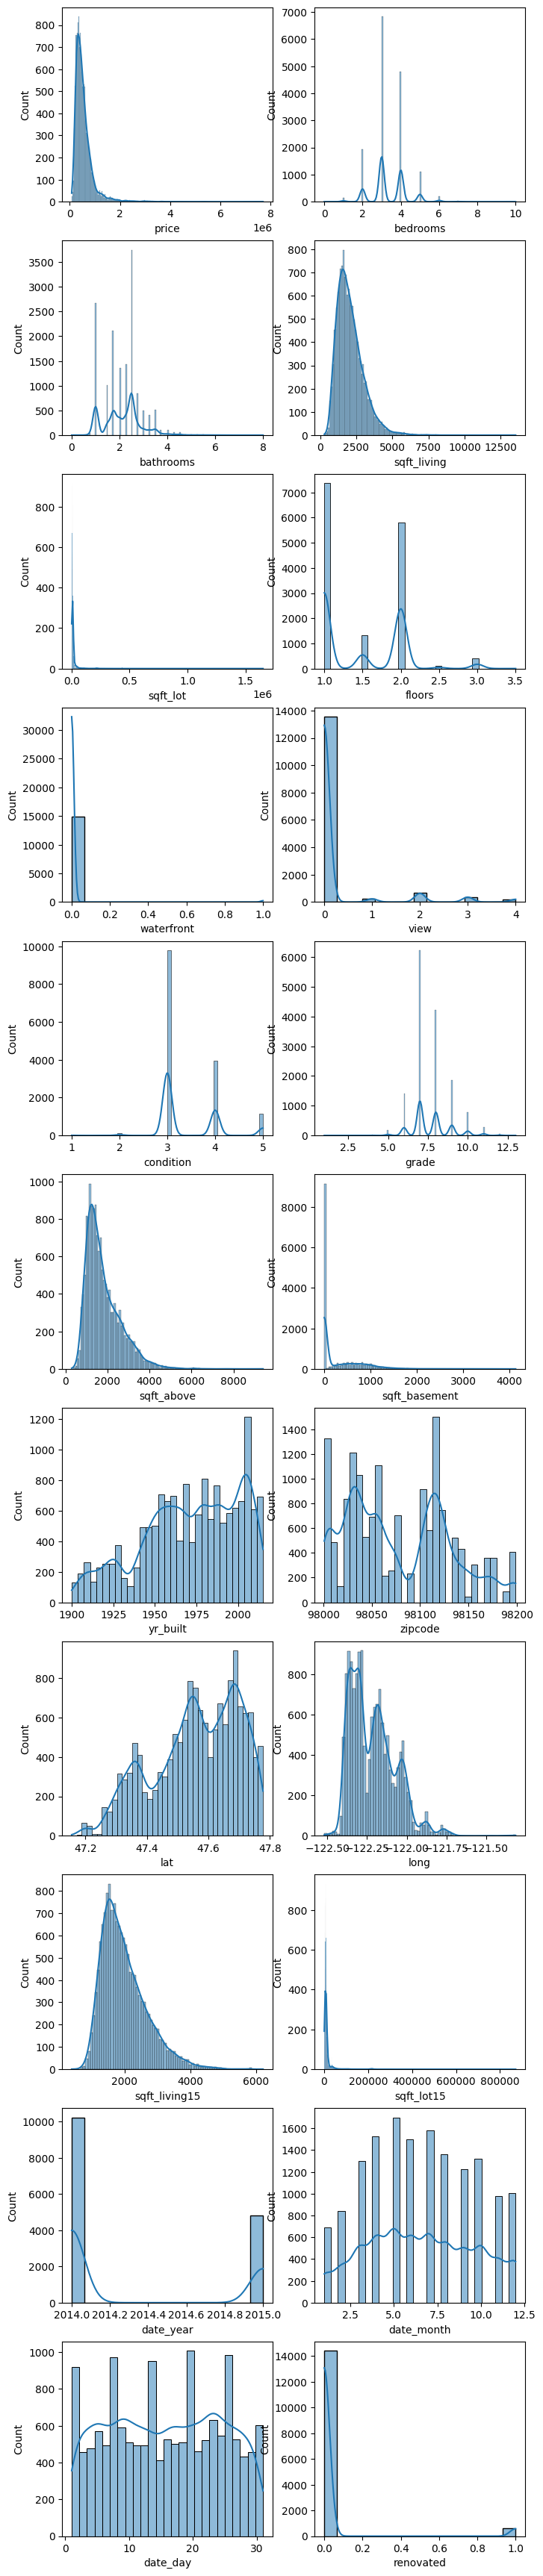

In [15]:
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(8, 44))
column_names = train_df.columns.tolist()
i = 0
for row in range(11):
    for col in range(2):
        ax = axes[row][col]
        column_name = column_names[i]
        sns.histplot(train_df[column_name], kde=True, ax=ax)
        i += 1


In [16]:
# feature
skewed_features = [
    "sqft_living", "sqft_lot", "sqft_above", "sqft_basement",
    "yr_built", "sqft_living15", "sqft_lot15"
]

for feature in skewed_features:
    train_df[feature] = np.log1p(train_df[feature])
    test_df[feature] = np.log1p(test_df[feature])

# target
train_df["price"] = np.log1p(train_df["price"])

### 데이터 상관 관계 확인

<Axes: >

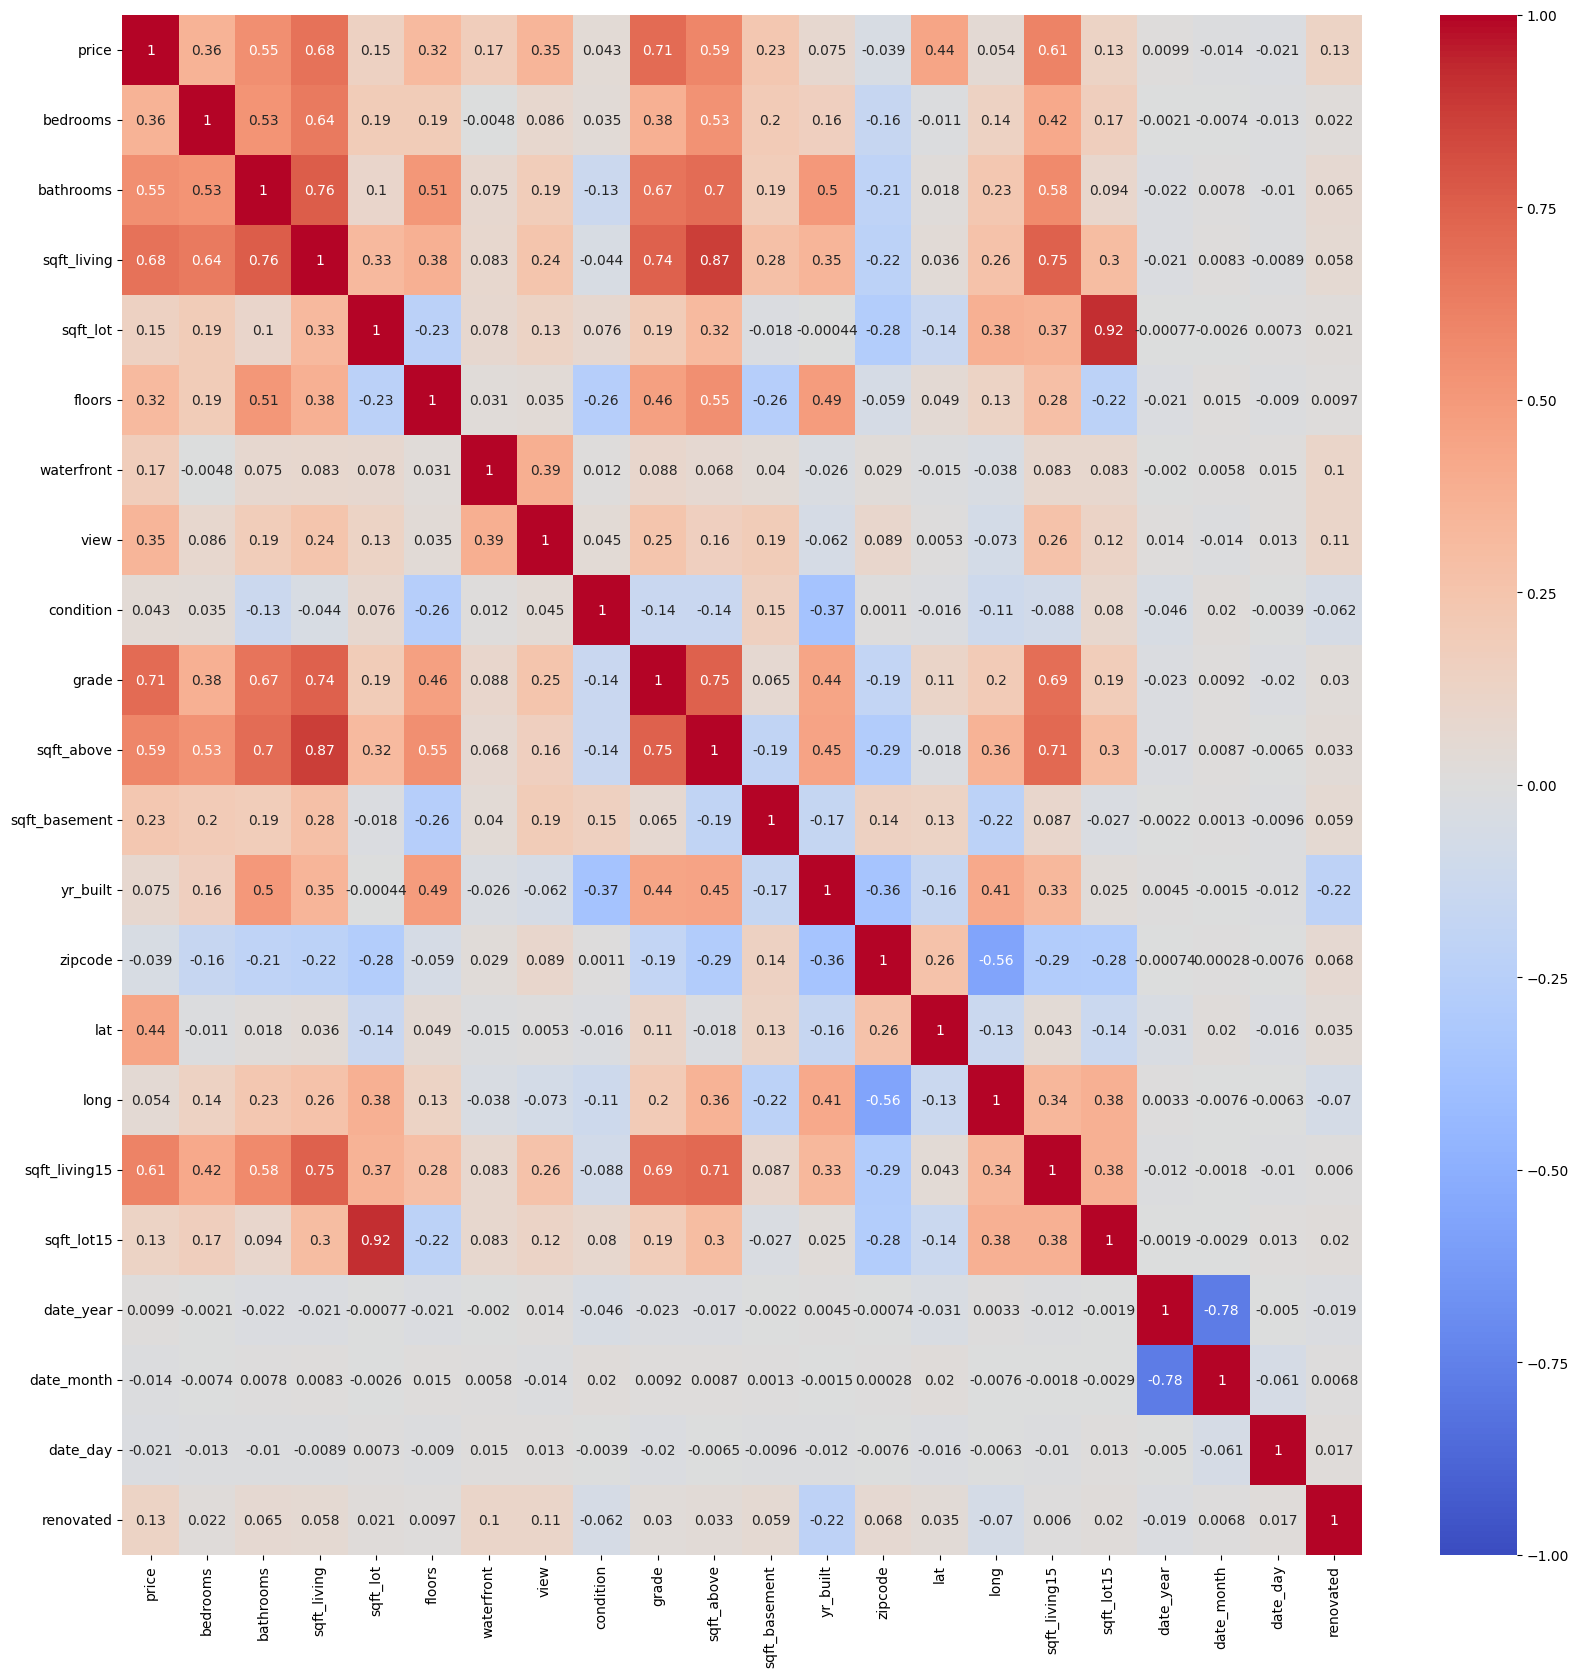

In [17]:
# 강한 상관 관계를 갖는 데이터가 많다 @.@
# 공간에 대한 데이터들이 서로 비례 관계를 많이 갖는다 (e.g. 침실 개수<->부지 넓이)
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(), annot=True, vmax=1, vmin=-1, cmap="coolwarm")

### 데이터 스케일링

In [18]:
from sklearn.preprocessing import MinMaxScaler

X_train = train_df.drop(columns=["price"])
y_train = train_df["price"]
X_test = test_df.copy()

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 모델

In [19]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
def root_mean_squared_error(y, y_pred):
    y = np.expm1(y)
    y_pred = np.expm1(y_pred)
    return np.sqrt(mean_squared_error(y, y_pred))

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((12028, 21), (3007, 21), (12028,), (3007,))

### 모델 선택

In [22]:
# LGBMRegressor의 성능이 가장 좋게 나와 이를 사용한다.
models = [
    RandomForestRegressor(random_state=42),
    XGBRegressor(random_state=42),
    LGBMRegressor(random_state=42),
]
errors = []

for model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    error = root_mean_squared_error(y_valid, y_pred)
    errors.append(error)

for model, error in zip(models, errors):
    print(model.__class__.__name__, error)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2305
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 21
[LightGBM] [Info] Start training from score 13.049501
RandomForestRegressor 123730.11455461763
XGBRegressor 115370.6421510141
LGBMRegressor 109063.33128023492


### tuning

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

# RandomizedSearchCV에서 cross validation을 하기 때문에 데이터를 합친다
X = np.concatenate([X_train, X_valid], axis=0)
y = np.concatenate([y_train, y_valid], axis=0)

param_grid = {
    "num_leaves": np.arange(20, 150, step=10),
    "max_depth": np.arange(3, 12, step=1),
    "learning_rate": np.logspace(-3, 0, num=10),
    "n_estimators": np.arange(50, 200, step=10),
    "min_child_samples": np.arange(5, 30, step=5),
    "subsample": np.linspace(0.5, 1, num=6),
    "colsample_bytree": np.linspace(0.5, 1, num=6),
    "reg_alpha": np.logspace(-3, 1, num=10),
    "reg_lambda": np.logspace(-3, 1, num=10),
}

model = LGBMRegressor(random_state=42)
grid = RandomizedSearchCV(model, param_grid, cv=5,
                          scoring=make_scorer(root_mean_squared_error, greater_is_better=False),
                          n_jobs=-1, n_iter=100,
                          verbose=0)
grid.fit(X, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2312
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 21
[LightGBM] [Info] Start training from score 13.048122


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'learning_rate': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ]),
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_child_samples': array([ 5, 10, 15, 20, 25])...
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
                                        'reg_lambda': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   scoring=make_scorer(root_mean_squared_error, greater_is_better=False))

In [29]:
display(grid.best_estimator_)

y_pred = grid.best_estimator_.predict(X_valid)
root_mean_squared_error(y_valid, y_pred)

LGBMRegressor(colsample_bytree=0.5, max_depth=11, min_child_samples=5,
              n_estimators=110, num_leaves=80, random_state=42,
              reg_alpha=0.0027825594022071257, reg_lambda=1.2915496650148828)

67673.75175515746

In [27]:
grid.best_params_

{'subsample': 1.0,
 'reg_lambda': 1.2915496650148828,
 'reg_alpha': 0.0027825594022071257,
 'num_leaves': 80,
 'n_estimators': 110,
 'min_child_samples': 5,
 'max_depth': 11,
 'learning_rate': 0.1,
 'colsample_bytree': 0.5}

## Submission

In [30]:
# model = LGBMRegressor(**grid.best_params_)
# model.fit(X, y)

# y_pred = model.predict(X_test)
y_pred = grid.best_estimator_.predict(X_test)
y_pred = np.expm1(y_pred)

submission_df["price"] = y_pred
submission_df.to_csv("submission_lgbm.csv", index=False)

---

### 회고

- private score: 113527.43920
- public score: 116861.70520

시간 상 전처리 부분은 많이 보지 못하고 하이퍼파라미터 튜닝을 통해 어느정도 성능이 개선될 줄 알았지만 하이퍼파라미터 튜닝만으로는 스코어가 쉽게 좋아지지 않았다.
실제 competition에서는 데이터 전처리를 여러 방식으로 수행해볼 여유가 필요할 것 같다.